In [5]:
#imports

import os
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import re
%matplotlib inline

In [10]:
#navigate to the relevant directory
os.chdir('/Users/andrewcaffey/Documents/Projects/Data/PCPP/Part_Scraping/CPU/pages/')

#setup an empty list that we will put dictionaries into. 
cpus = []

#loop through the HTML files
for i in os.listdir(os.getcwd()):
    #open the file
    text = open(i, "r")
    
    if i == '.DS_Store': 
        pass
    
    else:
        #read the text
        html = text.read()
        #form a beautiful soup object
        b = BeautifulSoup(html)
        #define search results that give us the data we want from each file
        data = b.find('tbody', attrs={'id':'category_content'}).find_all('tr')
        #loop through all of the items in the 
        for _ in range(len(data)):
            stats = []
            for info in data[_]:
                stats.append(info)
            dict1 = {'Name':stats[1].text,'Clock':float(stats[2].text[:-3]),'Cores':float(stats[3].text),'TDP':float(stats[4].text[:-1]),'Price':stats[7].text.strip('$')}
            cpus.append(dict1)
        #print data
    text.close()
    

In [17]:
df = pd.DataFrame(cpus)

In [38]:
df['clock_mhz'] = [float(x) if float(x) > 100 else float(x) * 1000 for x in df.Clock]
df['price'] = [float(x) if x != '' else 0 for x in df.Price]
df['core_count'] = [float(x) for x in df.Cores]
df['tdp_val'] = [float(x) if x != '' else 0 for x in df.TDP]
df['make'] = [x.split()[0] for x in df.Name]

cols = ['clock_mhz', 'price', 'core_count', 'tdp_val', 'make']

In [40]:
#remove rows for which all feature values in 'cols' (defined above) are not zero. Remember, 0 == False is True! 

df = df.loc[(df[cols]!=0).all(1)]

In [42]:
df.shape

(371, 12)

In [44]:
df.make.value_counts()

Intel    309
AMD       62
Name: make, dtype: int64

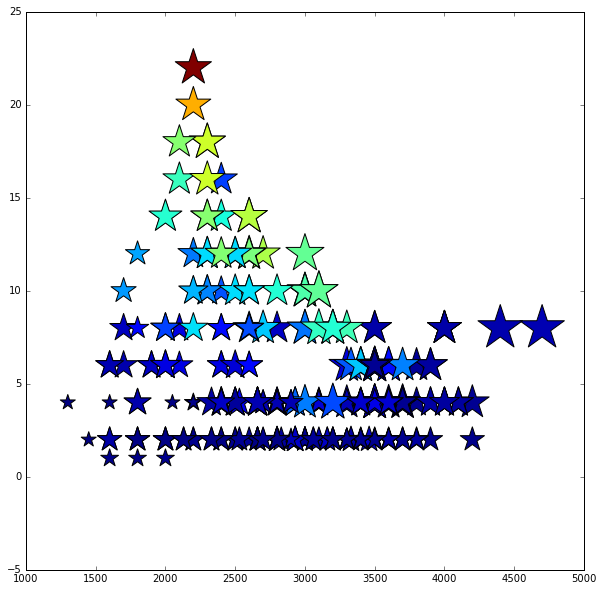

In [89]:
plt.figure(figsize=(10,10))
markers = [u'o', u'*']
plt.scatter(df.clock_mhz, df.core_count, c = df.price, s = df.tdp_val*10, marker=u'*')

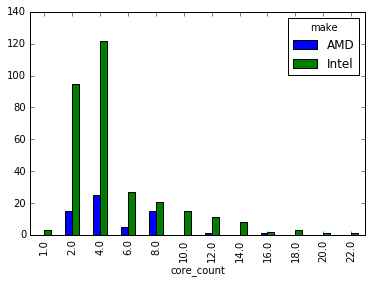

In [98]:
plt.figure(figsize=(10,10))
pd.crosstab(df.core_count, df.make).plot(kind='bar', )